# Mean Median Mode imputation

 This method is used when there is no relation between missing data column and other features

### Import Required libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly 

### load Dataset 

In [27]:
data = pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check null values

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
data.shape

(891, 12)

We can see that there is 177 null values in 'Age',687 in 'Cabin' and 2 in 'Embarked' feature.

<AxesSubplot:xlabel='Age'>

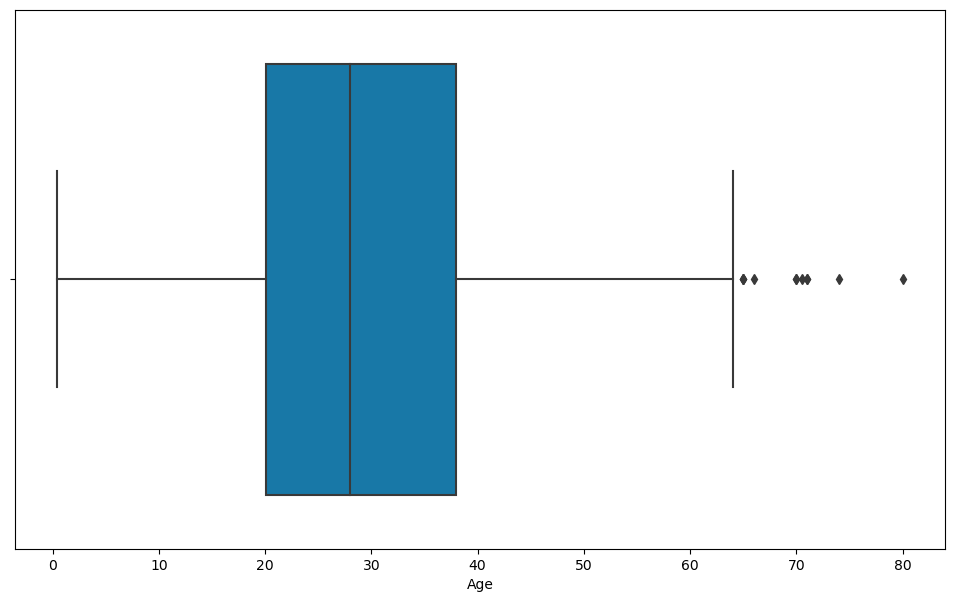

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',data=data,palette='winter')

In [31]:
#Since outliers are present in Age, so replace null values by median
data['Age'] = data['Age'].fillna(data['Age'].median())
#If outliers were not there, replace null values by mean

# Since more than 20% of data is missing in case of Cabin column, drop it from the dataset
data.drop('Cabin',axis=1,inplace=True)

#Since Embarked is a categorical data, missing values can be replaced by mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
#Or one can drop the missing values row in case of Embarked column
#data = data.dropna(subset=["Embarked"])   
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64